# Chapter5 - Exercise

In [81]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold, RepeatedKFold, cross_val_score
from sklearn.preprocessing import PolynomialFeatures

import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
plt.style.use('seaborn-whitegrid')

# 1
Use $Var(aX_{1}+bX_{2}) = a^{2}Var(X_{1}) + b^{2}Var(X_{2}) + 2abCov(X_{1},X_{2})$ and differentiate with $\alpha$

# 2

## (a)
$ 1 - \dfrac{1}{n}$
Since the probability of selecting one observation is $\dfrac{1}{n}$, the probability that the first bootstrap observation is not the jth observation is $ 1 - \dfrac{1}{n}$
## (b)
$ 1 - \dfrac{1}{n}$
Since bootstrap resampling is **with** replacement, the probability of selecting one observation is same as above.
## (c)
Since every observation is independent from each ohter and probability is same, $(1-\dfrac{1}{n})^{n}$ is the probability that the jth observation is not in the bootstrap sample.

## (d)
Then, the probability that the jth observation is not in the bootstrap sample is $1-(1-\dfrac{1}{n})^{n}$

In [82]:
def calc(n):
    return 1 - np.power((1-1/n),n)

In [83]:
calc(5)

0.67231999999999992

## (e)

In [84]:
calc(100)

0.63396765872677086

## (f)

In [85]:
calc(10000)

0.63213895356702954

In [86]:
p_list = []
for n in range(100000):
    p_list.append(calc(n+1))

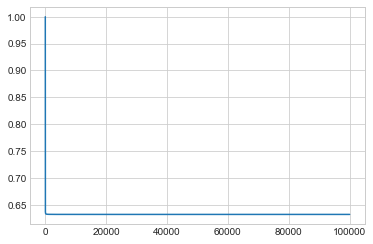

In [87]:
plt.plot(range(100000),p_list)

The probability that the jth observation is in the bootstrap sample converges to 0.6321
## (h)

In [88]:
# repeat bootstrap 10000 times
np.random.seed(1)
store = np.zeros(10000)
for i in range(10000):
    store[i] = 4 in np.random.choice(100,100)
np.mean(store)

0.63019999999999998

In [89]:
# repeat bootstrap 100000 times
np.random.seed(1)
store = np.zeros(100000)
for i in range(100000):
    store[i] = 4 in np.random.choice(100,100)
np.mean(store)

0.63424999999999998

# 3
## (a)
Cut data into k-fold and index them as 1,2,3,...,k. Then makes ith fold a test set and other folds a training set and makes an estimation and calculate error. Repeat this process for i=1,2,..,k and calculate the score as mean of k errors.
## (b)
**Validation Set Approach** uses too small data to estimate models which leads to higher bias than k-fold CV. But using this approach will not cause correlation between estimations so their variance will be lower than k-fold CV.

**LOOCV** uses large data to estimate model so this will lead to lower bias than k-fold CV. But using LOOCV will cause correlation between estimations so their variance will be higher than k-fold CV.

# 4
We could use bootstrap method to estimate the standard deviation of our prediction. The bootstrap method works by sampling observations with replacement from original data set B times and fitting a new model. Finally, Calculate RMSE of the estimates for B models.

# 5
## (a)

In [90]:
np.random.seed(1)
df = pd.read_excel('../Data/Default.xlsx')

In [91]:
X = df[['balance','income']]
y = df['default']

In [92]:
logit_a = skl_lm.LogisticRegression(solver='lbfgs').fit(X,y)

In [93]:
# i.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5,)

# ii.
logit_b = skl_lm.LogisticRegression(solver='lbfgs').fit(X_train,y_train)

# iii.
prob_b = logit_b.predict_proba(X_test)[:,1]
pred_default = np.where(prob_b>0.5,"Yes","No")

# iv.
confusion = pd.crosstab(pred_default,y_test)
print(confusion)
error = (confusion.iloc[0,1] + confusion.iloc[1,0])/len(X_test)
print("\nerror: ",error)

default    No  Yes
row_0             
No       4839  159
Yes         2    0

error:  0.0322


## (c)

In [94]:
for i in range(3):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5,
                                                       random_state = i)
    logit_c = skl_lm.LogisticRegression(solver='lbfgs').fit(X_train,y_train)
    prob_c = logit_c.predict_proba(X_test)[:,1]
    pred_default = np.where(prob_b>0.5,"Yes","No")
    
    confusion = pd.crosstab(pred_default, y_test)
    print(confusion)
    error = (confusion.iloc[0,1] + confusion.iloc[1,0])/len(X_test)
    print("\nerror: ", error)

default    No  Yes
row_0             
No       4812  186
Yes         2    0

error:  0.0376
default    No  Yes
row_0             
No       4839  159
Yes         2    0

error:  0.0322
default    No  Yes
row_0             
No       4844  154
Yes         2    0

error:  0.0312


## (d)

In [95]:
df['student2'] = np.where(df['student']=="Yes",1,0)
X = df[['income','balance','student2']]
y = df['default']

In [96]:
# i.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

# ii.
logit_b = skl_lm.LogisticRegression(solver='lbfgs').fit(X_train,y_train)

# iii.
prob_b = logit_b.predict_proba(X_test)[:,1]
pred_default = np.where(prob_b>0.5,"Yes","No")

# iv.
confusion = pd.crosstab(pred_default,y_test)
print(confusion)
error = (confusion.iloc[0,1] + confusion.iloc[1,0])/len(X_test)
print("\nerror: ",error)

default    No  Yes
row_0             
No       4808  135
Yes        28   29

error:  0.0326


Including a dummy variable for `student` does not have meaningful effect on the test error rate.

# 6
## (a)

In [97]:
np.random.seed(1)
X = df[['income', 'balance']]
X_1 = sm.add_constant(X)
y = np.where(df['default']=="Yes",1,0)

When using `statsmodels`, you need an workaround if you face 

**AttributeError: module 'scipy.stats' has no attribute 'chisqprob'**

In [98]:
from scipy import stats
# Workaround
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

In [99]:
est = smf.Logit(y, X_1).fit()
est.summary()

Optimization terminated successfully.
         Current function value: 0.078948
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Wed, 17 Jan 2018   Pseudo R-squ.:                  0.4594
Time:                        16:45:58   Log-Likelihood:                -789.48
converged:                       True   LL-Null:                       -1460.3
                                        LLR p-value:                4.541e-292
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.5405      0.435    -26.544      0.000     -12.393     -10.688
income      2.081e-05   4.99e-06      4.174      0.000     1.1e-05    3.06e-05
balance        0.0056      0.000     24.835      0.000       0.005       0.006
==============================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

## (b)

In [128]:
def boot_fn(data, index):
    X = data.loc[index,['income','balance']]
    y = data['default']
    logit = skl_lm.LogisticRegression(solver='lbfgs', max_iter=400).fit(X,y)
    return np.concatenate((logit.intercept_, logit.coef_.ravel()))

In [121]:
skl_lm.LogisticRegression?

In [101]:
# Reindex to make index start from 0 instead of 1
df.index = range(10000)

In [102]:
np.concatenate((logit.intercept_, logit.coef_.ravel()))

array([ -1.15404781e+01,   2.08091985e-05,   5.64710797e-03])

In [129]:
B = 50
beta_0 = []
beta_1 = []
beta_2 = []
for i in range(B):
    coef = boot_fn(df, range(10000))
    beta_0.append(coef[0])
    beta_1.append(coef[1])
    beta_2.append(coef[2])

In [133]:
print(np.mean(beta_0))
print(np.mean(beta_1))
print(np.mean(beta_2))
print(np.std(beta_0))
print(np.std(beta_1))
print(np.std(beta_2))

-11.5404781153
2.08091984553e-05
0.0056471079692
1.7763568394e-15
3.38813178902e-21
0.0


## (d)
Their errors are almost the same as the result from `LogisticRegression`
# 7
## (a)

In [110]:
weekly = pd.read_csv("../Data/Weekly.csv")

In [144]:
X = weekly[['Lag1', 'Lag2']]
y = weekly['Direction']

logit = skl_lm.LogisticRegression(solver='newton-cg', max_iter=400).fit(X,y)
print(logit.intercept_, logit.coef_)

[ 0.22122502] [[-0.03869814  0.06020749]]


## (b)

In [147]:
logit = skl_lm.LogisticRegression(solver='newton-cg', max_iter=400)
logit = logit.fit(X.drop(0),y.drop(0))
print(logit.intercept_, logit.coef_)

[ 0.22324404] [[-0.03840931  0.06080634]]


## (c)

In [164]:
pred = logit.predict_proba(X.iloc[0].values.reshape(-1,2))[0][1]
pred = "Up" if pred > 0.5 else "Down"
print("Prediction:",pred)
print("True:",y[0])

Prediction: Up
True: Down


## (d)

In [179]:
n = len(weekly)
error_list = []
for i in range(n):
    logit = (skl_lm.LogisticRegression(solver='newton-cg', max_iter=400)
             .fit(X.drop(0),y.drop(0)))
    pred = logit.predict_proba(X.iloc[i].values.reshape(-1,2))[0][1]
    pred = "Up" if pred > 0.5 else "Down"
    if pred == y[i]:
        error_list.append(0)
    else:
        error_list.append(1)

## (e)

In [181]:
np.mean(error_list)

0.44352617079889806

As you can see, error rate is quite high in this LOOCV classification.

# 8
## (a)

In [222]:
np.random.seed(123)
x = np.random.randn(100).reshape(-1,1)
y = x -2*(x**2) + np.random.randn(100).reshape(-1,1)

$Y=X-2X^{2}+\epsilon$

n = 100, p =2
## (b)
As you can see below, there is a quadratic relation between x and y.

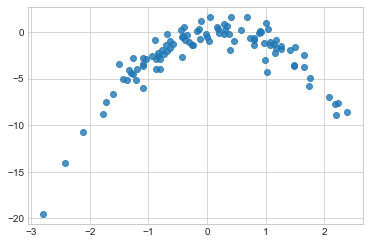

In [223]:
sns.regplot(x,y,fit_reg=False)

# (c)

In [224]:
np.random.seed(1)

p_order = np.arange(1,5) # 1,2,3,4

regr = skl_lm.LinearRegression()
loo = LeaveOneOut()
scores = list()

for i in p_order:
    poly = PolynomialFeatures(i)
    X_poly = poly.fit_transform(x)
    score = cross_val_score(regr, X_poly, y, cv=loo,
                            scoring='neg_mean_squared_error').mean()
    scores.append(score)
    
scores

[-10.89688256879475,
 -0.99317809310085992,
 -1.0305435813881334,
 -1.0326490105433541]

## (d)

In [225]:
np.random.seed(2)

p_order = np.arange(1,5) # 1,2,3,4

regr = skl_lm.LinearRegression()
loo = LeaveOneOut()
scores = list()

for i in p_order:
    poly = PolynomialFeatures(i)
    X_poly = poly.fit_transform(x)
    score = cross_val_score(regr, X_poly, y, cv=loo,
                            scoring='neg_mean_squared_error').mean()
    scores.append(score)

scores

[-10.89688256879475,
 -0.99317809310085992,
 -1.0305435813881334,
 -1.0326490105433541]

Since LOOCV calculate every estimates for n folds, there is no role for random number generator. So the results are the same as what i got in (d).

## (e)
Quadratic model (ii) had the smallest LOOCV error. This reflects the fact that true relationship between x and y are quadratic. Sometimes you might show that (iiii) had the smallest LOOCV but their error rates are quite similar to each other.

## (f)

In [233]:
df = DataFrame({'y':y.ravel(), 'x':x.ravel()})

In [237]:
# (i)
est = smf.ols('y ~ x', df).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-2.5615,0.319,-8.028,0.000,-3.195,-1.928
x,0.8013,0.283,2.834,0.006,0.240,1.362


In [238]:
# (ii)
est = smf.ols('y ~ x + np.power(x,2)', df).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.0149,0.130,0.115,0.909,-0.242,0.272
x,0.9858,0.087,11.277,0.000,0.812,1.159
"np.power(x, 2)",-2.0267,0.066,-30.546,0.000,-2.158,-1.895


In [239]:
# (iii)
est = smf.ols('y ~ x + np.power(x,2) + np.power(x,3)', df).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.0140,0.131,0.106,0.916,-0.247,0.275
x,0.9788,0.157,6.250,0.000,0.668,1.290
"np.power(x, 2)",-2.0261,0.068,-29.954,0.000,-2.160,-1.892
"np.power(x, 3)",0.0023,0.043,0.054,0.957,-0.083,0.087


In [240]:
# (iv)
est = smf.ols('y ~ x + np.power(x,2) + np.power(x,3) + np.power(x,4)', df).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-0.0953,0.163,-0.584,0.561,-0.420,0.229
x,1.0143,0.160,6.358,0.000,0.698,1.331
"np.power(x, 2)",-1.8287,0.188,-9.722,0.000,-2.202,-1.455
"np.power(x, 3)",-0.0168,0.046,-0.366,0.715,-0.108,0.074
"np.power(x, 4)",-0.0366,0.033,-1.125,0.264,-0.101,0.028


You can see that linear and quadratic terms are statistically significant, which agrees with the conclusions from CV.

# 9

In [241]:
boston = pd.read_csv('../Data/Boston.csv')

## (a)

In [245]:
mu = np.mean(boston.medv)

## (b)

$Var(\bar{X}) = Var(\dfrac{X_{1}+X_{2}+...+X_{n}}{n})=\dfrac{\sigma^{2}}{n}$

In [255]:
std_mu = np.std(boston.medv)/np.sqrt(len(boston.medv))
print(std_mu)

0.408456934697


## (c)

In [260]:
np.random.seed(1)
B = 200
length = len(boston.medv)
mu_list = []

for i in range(B):
    mu_boot = np.mean(boston['medv'][np.random.choice(length,length)])
    mu_list.append(mu_boot)
    
mu_boot = np.mean(mu_list)
std_mu_boot = np.std(mu_list)
print(std_mu_boot)

0.3993717381


They are somewhat similar to each other.
## (d)

In [261]:
conf_interval = [mu-2*std_mu,mu+2*std_mu]
conf_interval_boot = [mu_boot-2*std_mu_boot, mu_boot+2*std_mu_boot]
print(conf_interval)
print(conf_interval_boot)

[21.715892454716126, 23.34972019350527]
[21.660504547514719, 23.257991499916116]


## (e)

In [264]:
med = np.median(boston.medv)
print(med)

21.2


In [266]:
np.random.seed(1)
B = 200
length = len(boston.medv)
med_list = []

for i in range(B):
    med_boot = np.median(boston['medv'][np.random.choice(length,length)])
    med_list.append(med_boot)
    
med_boot = np.mean(med_list)
std_med_boot = np.std(med_list)
print(std_med_boot)

0.378059519124


## (f)

In [268]:
ten = np.percentile(boston.medv, 10)
print(ten)

12.75


In [270]:
np.random.seed(1)
B = 200
length = len(boston.medv)
ten_list = []

for i in range(B):
    ten_boot = np.percentile(boston['medv'][np.random.choice(length,length)], 10)
    ten_list.append(ten_boot)
    
ten_boot = np.mean(ten_list)
std_ten_boot = np.std(ten_list)
print(std_ten_boot)

0.452105905734
